# Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from warnings import filterwarnings

In [2]:
filterwarnings("ignore")

In [3]:
iris = pd.read_csv('iris.csv')

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


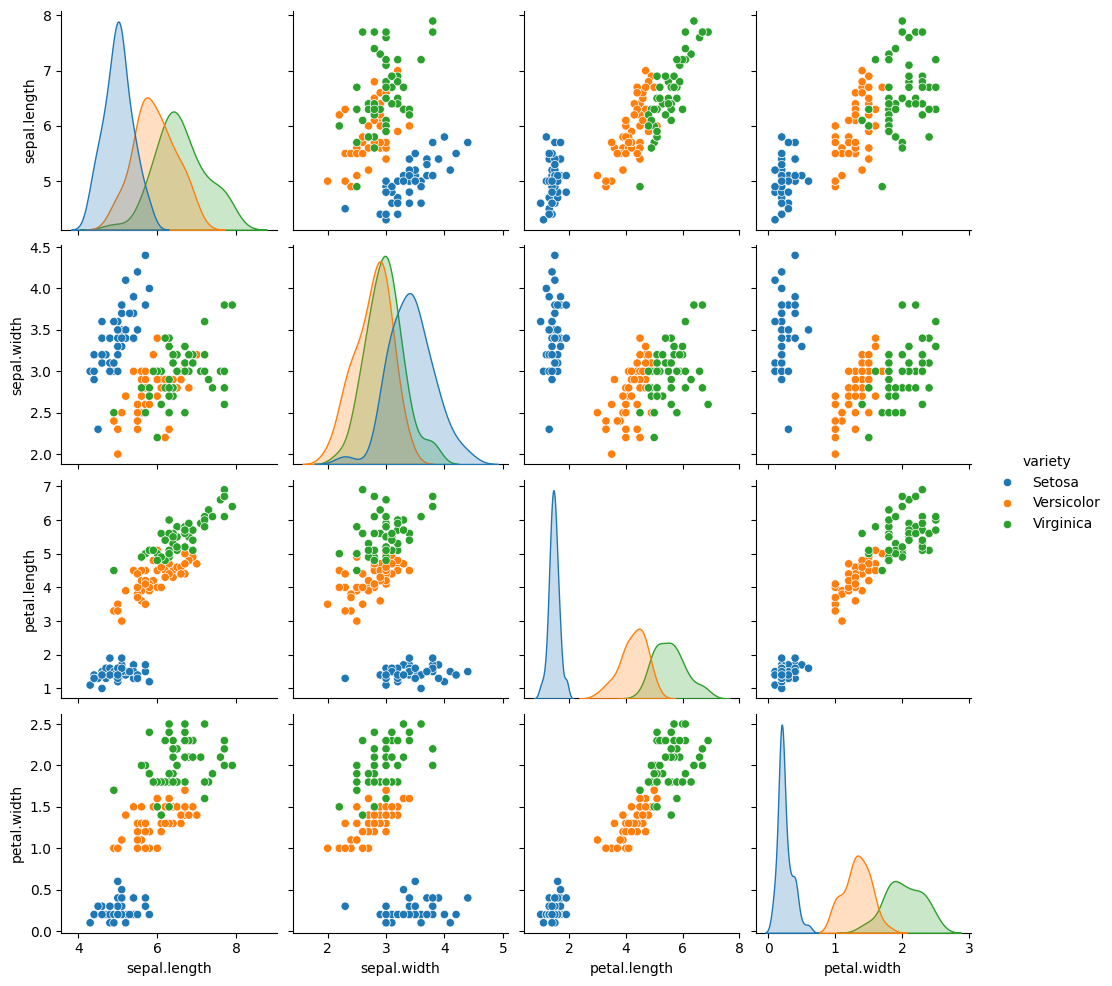

In [7]:
sns.pairplot(iris, hue = 'variety')

In [8]:
corr = iris.drop('variety',axis=1).corr()

<Axes: >

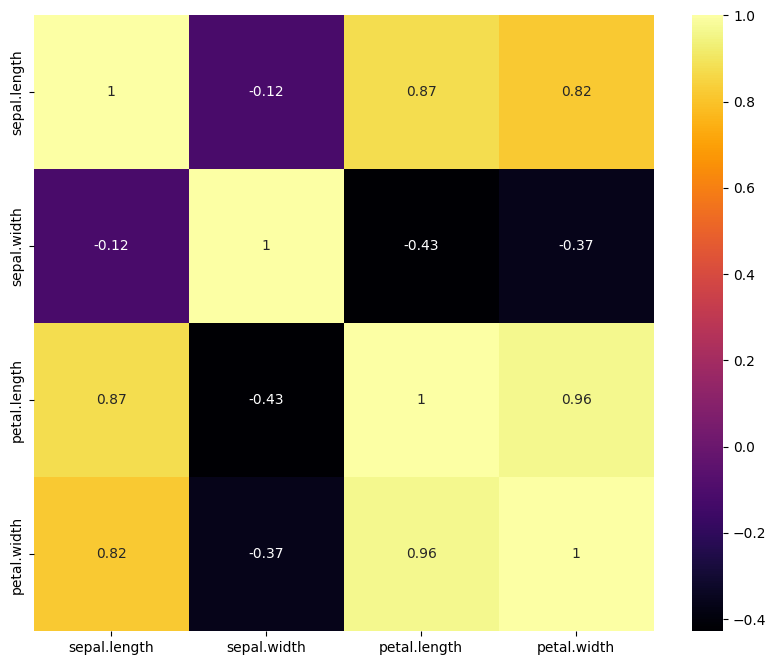

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True , cmap= 'inferno')

In [10]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [11]:
X = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

In [12]:
print(X.shape)
X.head(5)

(150, 4)


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = iris['variety']
y.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [14]:
y.shape

(150,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)
print('Données entrainment: ', X_train.shape)
print('Données de test: ', X_test.shape)

Données entrainment:  (105, 4)
Données de test:  (45, 4)


In [16]:
model = KNeighborsClassifier(n_neighbors = 50)

In [17]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [18]:
print('La performance du modèle sur la base des données d\'apprentissage: ', model.score(X_train, y_train))

La performance du modèle sur la base des données d'apprentissage:  0.8952380952380953


In [19]:
predictions = model.predict(X_test)

In [20]:
print('La performance du modèle sur la base des données de test :', model.score(X_test, y_test))

La performance du modèle sur la base des données de test : 0.9777777777777777


### La Cross-Validation (CV) pour déterminer le meilleur score :

In [21]:
cross_val_score(KNeighborsClassifier(15), X_train, y_train, cv = 10, scoring = 'accuracy') # cv = 10 car 10% du trainDataSet est 10.5 = [150*0.7]*0.1

array([0.90909091, 1.        , 0.90909091, 0.90909091, 1.        ,
       0.9       , 0.9       , 0.9       , 1.        , 0.9       ])

 &#128295; cv=10 signifie que la validation croisée sera effectuée en utilisant une validation croisée à 10 plis. Cela signifie que les données seront divisées en 10 ensembles de taille égale, et le modèle sera entraîné et évalué 10 fois

#####  <font color='magenta'>&rArr;</font> On a obtenu le Score détenu pour chaque Split (10 % du trainDataSet) de données d'entrainement .

Il serait plus important de calculer la moyenne des scores obtenus pour chaque variation de l'hyperparamètre 'k' :

In [22]:
cross_val_score(KNeighborsClassifier(15), X_train, y_train, cv = 10, scoring = 'accuracy').mean()

0.9327272727272728

In [23]:
score_validation = []
for k in range(1,26):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    score_validation.append(score)

In [24]:
score_validation

[0.9345454545454546,
 0.9254545454545454,
 0.9336363636363636,
 0.9136363636363637,
 0.9427272727272727,
 0.9427272727272727,
 0.9527272727272728,
 0.9227272727272728,
 0.9518181818181818,
 0.9427272727272727,
 0.9518181818181818,
 0.9518181818181818,
 0.9618181818181819,
 0.9327272727272728,
 0.9327272727272728,
 0.9327272727272728,
 0.9518181818181818,
 0.9327272727272728,
 0.9327272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9427272727272727,
 0.9327272727272728,
 0.9327272727272728]

In [25]:
score_max = np.max(score_validation)
index = np.argmax(score_validation)
print(f'pour k = {index+1} on abtenu une moyenne de score égale à {score_max} ==> Valeur de k  = {index+1} est le meilleur hyperparamètre pour notre modèle KNN ')

pour k = 13 on abtenu une moyenne de score égale à 0.9618181818181819 ==> Valeur de k  = 13 est le meilleur hyperparamètre pour notre modèle KNN 


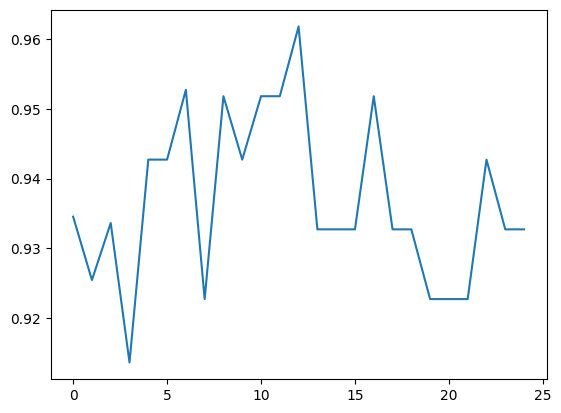

In [26]:
plt.plot(score_validation)

### On peut résumer tout ce qui venait en haut dans une seul commande en utilisant la fonction 'Validation_Curve()' qui va prendre en argument:

*  modèle + les données d'entraînement X_train et y_train + le nom de l'hyperparamètre du modèle + le range choisi pour notre hyperparamètre .
* prend également l'argument 'cv' pour determiner le nombre de données dans le validationSet depuis le trainDataSet .


In [27]:
model = KNeighborsClassifier()

In [28]:
k = np.arange(1,26)
score_apprentissage, score_validation = validation_curve(model, X_train, y_train,              #-> tuple[ndarray, ndarray]
                                                        param_name = 'n_neighbors',            # issu de la définition de la classe KNeighborsClassifier()
                                                        param_range = k, cv = 10)
#cv=10 signifie que la validation croisée sera effectuée en utilisant une validation croisée à 10 plis. 
#Cela signifie que les données seront divisées en 10 ensembles de taille égale, et le modèle sera entraîné et évalué 10 fois.

In [29]:
print(score_apprentissage.shape,'\n')
# print(score_apprentissage)
score_app_Df = pd.DataFrame(data = score_apprentissage, index = np.arange(1,26), columns = [f"Split{n}" for n in range(1,11)])
score_app_Df.index.name ="Valeur de k"
score_app_Df.columns.name ="Numéro du Split\Entrainement"
score_app_Df

(25, 10) 



Numéro du Split\Entrainement,Split1,Split2,Split3,Split4,Split5,Split6,Split7,Split8,Split9,Split10
Valeur de k,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.968085,0.968085,0.968085,0.957447,0.957447,0.957895,0.947368,0.968421,0.957895,0.947368
3,0.957447,0.936170,0.946809,0.957447,0.936170,0.947368,0.936842,0.947368,0.936842,0.947368
4,0.968085,0.946809,0.957447,0.968085,0.946809,0.968421,0.936842,0.968421,0.947368,0.926316
5,0.968085,0.957447,0.957447,0.957447,0.946809,0.968421,0.947368,0.968421,0.947368,0.947368
6,0.968085,0.957447,0.968085,0.978723,0.957447,0.968421,0.936842,0.978947,0.957895,0.936842
7,0.968085,0.968085,0.968085,0.968085,0.957447,0.968421,0.947368,0.978947,0.957895,0.947368
8,0.968085,0.957447,0.968085,0.978723,0.957447,0.968421,0.936842,0.978947,0.957895,0.947368
9,0.968085,0.968085,0.968085,0.968085,0.957447,0.978947,0.957895,0.978947,0.957895,0.947368


In [30]:
print(score_validation.shape,'\n')
# print(score_validation)
score_val_Df = pd.DataFrame(data = score_validation, index = np.arange(1,26), columns = [f"Split{n}" for n in range(1,11)])
score_val_Df.index.name ="Valeur de k"
score_val_Df.columns.name ="Numéro du Split"
score_val_Df

(25, 10) 



Numéro du Split,Split1,Split2,Split3,Split4,Split5,Split6,Split7,Split8,Split9,Split10
Valeur de k,,,,,,,,,,
1,0.818182,0.909091,0.909091,0.909091,1.0,0.9,1.0,0.9,1.0,1.0
2,0.727273,0.909091,0.909091,0.909091,1.0,0.9,1.0,0.9,1.0,1.0
3,0.818182,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.8,1.0,1.0
4,0.909091,0.909091,0.909091,0.909091,1.0,0.9,1.0,0.7,1.0,0.9
5,0.909091,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.8,1.0,1.0
6,0.909091,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.8,1.0,1.0
7,0.909091,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.9,1.0,1.0
8,0.909091,1.000000,0.909091,0.909091,1.0,0.9,0.9,0.8,1.0,0.9
9,1.000000,1.000000,0.909091,0.909091,1.0,1.0,0.9,0.9,1.0,0.9


In [31]:
score_val_Df['Moyenne'] = score_val_Df.mean(axis = 1) #axis = 1 (sommation selon l'axis 1) pour avoir la moyenne des lignes qui nous interessent dans notre cas 
score_val_Df

Numéro du Split,Split1,Split2,Split3,Split4,Split5,Split6,Split7,Split8,Split9,Split10,Moyenne
Valeur de k,,,,,,,,,,,
1,0.818182,0.909091,0.909091,0.909091,1.0,0.9,1.0,0.9,1.0,1.0,0.934545
2,0.727273,0.909091,0.909091,0.909091,1.0,0.9,1.0,0.9,1.0,1.0,0.925455
3,0.818182,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.8,1.0,1.0,0.933636
4,0.909091,0.909091,0.909091,0.909091,1.0,0.9,1.0,0.7,1.0,0.9,0.913636
5,0.909091,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.8,1.0,1.0,0.942727
6,0.909091,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.8,1.0,1.0,0.942727
7,0.909091,1.000000,0.909091,0.909091,1.0,0.9,1.0,0.9,1.0,1.0,0.952727
8,0.909091,1.000000,0.909091,0.909091,1.0,0.9,0.9,0.8,1.0,0.9,0.922727
9,1.000000,1.000000,0.909091,0.909091,1.0,1.0,0.9,0.9,1.0,0.9,0.951818


In [32]:
score_val_Df['Moyenne'].argmax()+1 # car notre Dataframe commence par 1 et argmax compte indépendamment commencant de 0 .

13

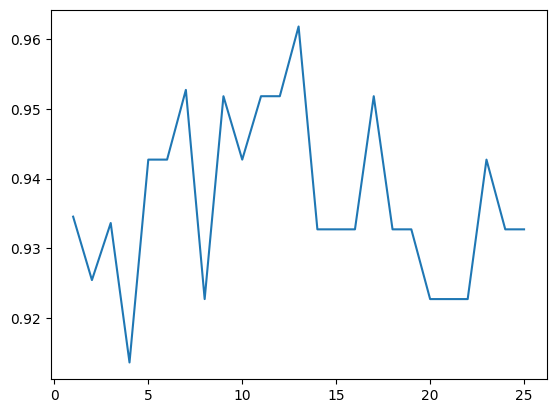

In [33]:
plt.plot(k, score_val_Df['Moyenne'])

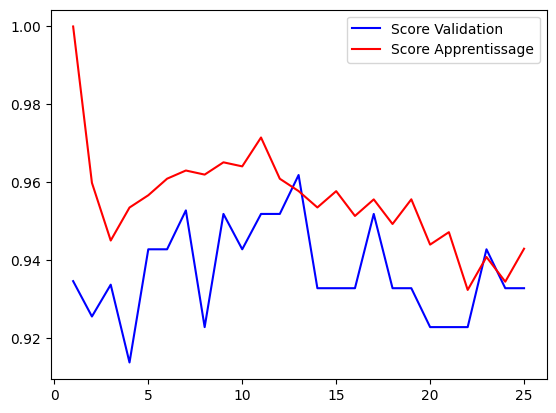

In [34]:
plt.plot(k, score_val_Df['Moyenne'], label="Score Validation", c='b')
plt.plot(k, score_apprentissage.mean(axis = 1), label="Score Apprentissage", c='r')
plt.legend()

### Utilisation de GridSearchCV :

*Le code suivant définit un ensemble de paramètres pour une recherche de grille (grid search) dans un algorithme de classification des voisins les plus proches (k-NN). Voici une explication détaillée des paramètres définis dans grid_param :*

* **'n_neighbors':** C'est le nombre de voisins à considérer pour chaque point lors de la classification. Dans ce cas, np.arange(1,25) crée une plage allant de 1 à 24 inclus, ce qui signifie que la recherche de grille explorera différents nombres de voisins, allant de 1 à 24.

* **'weights':** C'est le schéma de pondération utilisé dans la classification. Il peut prendre deux valeurs :

    'uniform': Tous les voisins ont le même poids dans la classification.

    'distance': Les voisins les plus proches ont un poids plus élevé que les voisins plus éloignés, ce qui signifie que la contribution à la classification est pondérée en fonction de la distance.

* **'metric':** C'est la mesure de distance utilisée pour calculer la similarité entre les points. Trois métriques de distance sont spécifiées :

    'euclidean': C'est la distance euclidienne, la distance la plus couramment utilisée, qui mesure la distance "en ligne droite" entre deux points dans un espace euclidien.

    'manhattan': Aussi connue sous le nom de distance de la ville, c'est la somme des différences absolues des coordonnées entre deux points. Elle mesure la distance en déplaçant horizontalement et verticalement, simulant ainsi les déplacements dans une ville où les rues sont disposées en grille.
    
    'minkowski': C'est une généralisation de la distance euclidienne et de la distance de Manhattan. La distance de Minkowski d'ordre p entre deux points est définie comme la somme des valeurs absolues des différences de coordonnées élevées à la puissance p, puis prise à la puissance 1/p.

En résumé, grid_param définit un ensemble de paramètres à explorer lors de la recherche de la meilleure configuration pour l'algorithme de classification des k-NN. Cela inclut différentes valeurs pour le nombre de voisins, les schémas de pondération et les mesures de distance.

In [35]:
grid_param = {'n_neighbors': np.arange(1,25),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}

In [36]:
grid = GridSearchCV(KNeighborsClassifier(), grid_param, cv = 10)

In [37]:
X_train.shape

(105, 4)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [39]:
grid.best_score_

0.9718181818181819

In [40]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}

### <font color='yellow'> &#128980; </font> On peut maintenant mettre à jour notre modèle après avoir eu les meilleures hyperparamètre .

In [41]:
model = grid.best_estimator_
model

KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')

In [42]:
model.score(X_test, y_test)

1.0

##### <font color=magenta> &#9998; </font> On peut dire que la <b> GridSearchCV </b> est plus complète pour déterminer les meilleurs hyperparamètres car elle prend en compte plusieurs hyperparamètre au lieu d'un comme dans validation Curve .

***

### Utilisation de la matrice de confusion : 

<font color='azur'><b>Confusion_matrix():</b></font> C'est une fonction qui prend deux vecteurs d'étiquettes en entrée (les étiquettes réelles et les étiquettes prédites) et calcule la matrice de confusion correspondante. La matrice de confusion est une table qui est souvent utilisée pour décrire les performances d'un modèle de classification. Elle montre le nombre d'exemples correctement classés pour chaque classe ainsi que les erreurs de classification.

In [43]:
cm = confusion_matrix(y_test, model.predict(X_test))
print(cm)

[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


&#128400; Essayons de representer graphiquement cette matrice de confusion : 

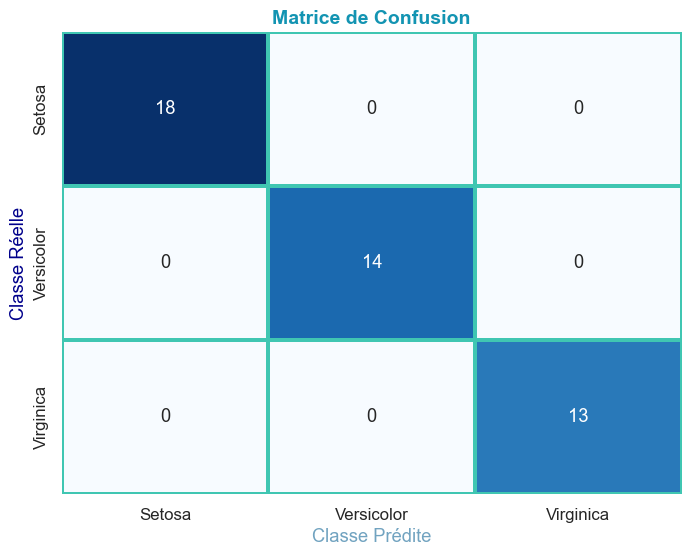

In [44]:
# Étiquettes des classes
#classes = ['Setosa', 'Versicolor', 'Virginica']
classes = list(y.unique())

# Création du heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1) # Ajuste la taille de la police d'écriture.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False, linewidths=1.5, linecolor= '#40c6b2')# fmt='d' = formatage des annot en 'entier' //  cbar=True = affichage de la bare de couleur
plt.xlabel('Classe Prédite' , color = '#71a3c0')
plt.ylabel('Classe Réelle', color = 'darkblue')
plt.title('Matrice de Confusion',fontsize=14, fontweight='bold', color='#1394b2')
plt.show()

***

### Prédiction de la variété avec le modèle final :

In [45]:
model.predict([[10,9, 5, 4]]) #, les deux crochets [[]] sont utilisés pour créer une liste externe contenant une liste interne qui
# représente les caractéristiques d'un seul échantillon de données

array(['Virginica'], dtype=object)

In [46]:
model.predict([[4,2,3,1]])

array(['Versicolor'], dtype=object)

***

### Learning Curve :


La fonction learning_curve est utilisée en apprentissage automatique pour évaluer les performances d'un modèle en fonction de la taille de l'ensemble d'entraînement. Elle permet de tracer une courbe d'apprentissage qui montre comment la précision (ou toute autre métrique de performance) du modèle évolue en fonction du nombre d'exemples d'entraînement utilisés. Cela permet d'analyser la capacité du modèle à généraliser à partir des données d'entraînement.

Voici ce que chaque paramètre de la fonction learning_curve signifie :

* model : Le modèle d'apprentissage automatique que vous souhaitez évaluer.
* X_train : Les caractéristiques (features) de l'ensemble d'entraînement.
* y_train : Les étiquettes (labels) correspondantes de l'ensemble d'entraînement.
* cv : Le nombre de folds dans la validation croisée. Cela divise les données en cv parties égales, utilise cv-1 parties pour l'entraînement et la partie restante pour la validation.
* train_sizes : Les tailles de l'ensemble d'entraînement à utiliser pour l'évaluation. Vous spécifiez généralement un tableau de tailles de l'ensemble d'entraînement pour lesquelles vous souhaitez obtenir des scores d'apprentissage. Par exemple, np.linspace(0.2, 1.0, 10) génère 10 valeurs linéairement réparties entre 20% et 100% de la taille de l'ensemble d'entraînement.

In [47]:
data , score_apprentissage, score_validation = learning_curve(model, X_train, y_train, cv = 10,
                                                             train_sizes = np.linspace(0.2,1.0,10))

La fonction learning_curve renvoie trois éléments :

* train_sizes ou data : Les tailles d'entraînement utilisées par rapport à 100% du trainSet.
* score_apprentissage : Les scores (habituellement la précision) du modèle sur l'ensemble d'entraînement pour chaque taille d'entraînement.
* score_validation : Les scores du modèle sur l'ensemble de validation (calculé à l'aide de la validation croisée) pour chaque taille d'entraînement.

In [48]:
data

array([18, 27, 35, 43, 52, 60, 68, 77, 85, 94])

In [49]:
score_apprentissage

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [50]:
score_validation

array([[0.90909091, 0.90909091, 0.90909091, 0.81818182, 0.90909091,
        0.8       , 0.8       , 0.8       , 1.        , 1.        ],
       [0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
        0.8       , 0.8       , 0.8       , 1.        , 0.8       ],
       [0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
        0.8       , 0.8       , 0.7       , 1.        , 0.8       ],
       [0.90909091, 0.90909091, 0.90909091, 0.90909091, 1.        ,
        0.9       , 0.8       , 0.7       , 1.        , 0.8       ],
       [0.90909091, 1.        , 0.90909091, 0.81818182, 1.        ,
        0.9       , 0.9       , 0.8       , 1.        , 0.9       ],
       [0.90909091, 1.        , 0.90909091, 0.81818182, 1.        ,
        1.        , 0.9       , 0.8       , 1.        , 0.8       ],
       [0.90909091, 1.        , 0.90909091, 0.90909091, 1.        ,
        0.9       , 0.9       , 0.8       , 1.        , 0.9       ],
       [0.90909091, 1.        , 0.9090909

****

  Ces trois valeurs sont utilisées pour tracer la courbe d'apprentissage et analyser les performances du modèle en fonction de la taille de l'ensemble d'entraînement. Cela permet de détecter le surapprentissage (overfitting) ou le sous-apprentissage (underfitting) en fonction de la différence entre les scores d'apprentissage et de validation. Une grande différence entre les deux peut indiquer un surapprentissage, tandis qu'une petite différence peut indiquer un sous-apprentissage.

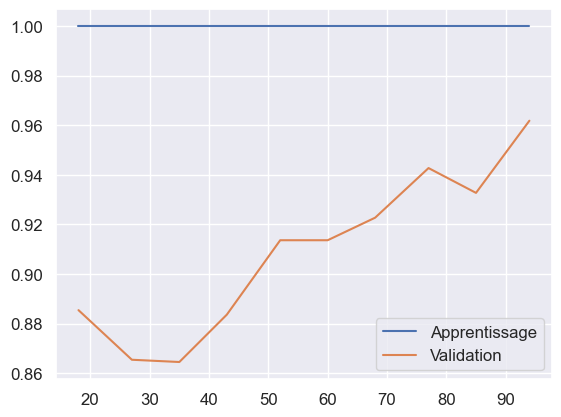

In [51]:
plt.plot(data, score_apprentissage.mean(axis = 1), label = 'Apprentissage')
plt.plot(data, score_validation.mean(axis =1), label = 'Validation')
plt.legend()